In [1]:
import qiskit
import qiskit_superstaq

In [2]:
provider = qiskit_superstaq.superstaq_provider.SuperstaQProvider("YOUR API KEY")

In [ ]:
# Do this if you need to upload new configs:
res = provider.aqt_upload_configs(
    "Insert path to your Pulses.yaml", "Insert path to your Variables.yaml"
)

In [ ]:
provider.aqt_save_configs("Pulses.yaml", "Variables.yaml")

## Single circuit compilation

In [5]:
circuit1 = qiskit.QuantumCircuit(8)
for i in range(4, 8):
    circuit1.h(i)
circuit1.draw(fold=-1)

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
     ┌───┐
q_4: ┤ H ├
     ├───┤
q_5: ┤ H ├
     ├───┤
q_6: ┤ H ├
     ├───┤
q_7: ┤ H ├
     └───┘

In [ ]:
compiler_output = provider.aqt_compile(circuit1)

In [7]:
print(compiler_output.circuit)

     ┌─────────┐┌─────────┐┌─────────┐
q_0: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├
     ├─────────┤├─────────┤├─────────┤
q_1: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├
     ├─────────┤├─────────┤├─────────┤
q_2: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├
     ├─────────┤├─────────┤├─────────┤
q_3: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├
     └─────────┘└─────────┘└─────────┘


(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 0'}, xlabel='Time (us)'>)

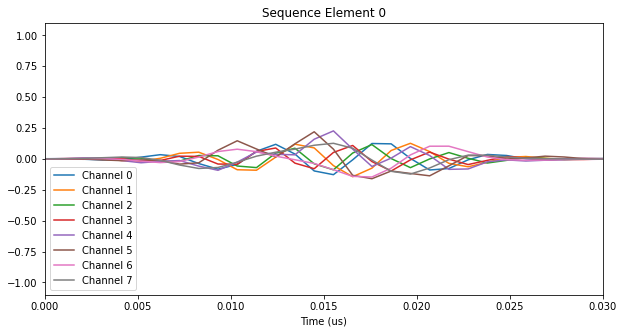

In [8]:
compiler_output.seq.plot(element=0)

## Multiple circuit compilation

In [9]:
circuit2 = qiskit.QuantumCircuit(8)
circuit2.swap(4, 5)
circuit2.h(6)
circuit2.draw(fold=-1)

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ──X──
       │  
q_5: ──X──
     ┌───┐
q_6: ┤ H ├
     └───┘
q_7: ─────

In [ ]:
compiler_output = provider.aqt_compile([circuit1, circuit2])

In [11]:
print(compiler_output.circuits[0])
print()
print(compiler_output.circuits[1])

     ┌─────────┐┌─────────┐┌─────────┐
q_0: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├
     ├─────────┤├─────────┤├─────────┤
q_1: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├
     ├─────────┤├─────────┤├─────────┤
q_2: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├
     ├─────────┤├─────────┤├─────────┤
q_3: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├
     └─────────┘└─────────┘└─────────┘

     ┌─────────┐                           ┌───────┐ ┌─────────┐ ┌───────┐     »
q_0: ┤ Rx(π/2) ├────────────────────────■──┤ Rz(π) ├─┤ Rx(π/2) ├─┤ Rz(π) ├───■─»
     ├─────────┴┐┌─────────┐┌─────────┐ │ ┌┴───────┴┐├─────────┤┌┴───────┴─┐ │ »
q_1: ┤ Rz(-π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├─■─┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(3π/2) ├─■─»
     ├─────────┬┘├─────────┤├─────────┤   └─────────┘└─────────┘└──────────┘   »
q_2: ┤ Rz(π/2) ├─┤ Rx(π/2) ├┤ Rz(π/2) ├────────────────────────────────────────»
     └─────────┘ └─────────┘└─────────┘                                        »
«     ┌─────────┐                          ┌──────────┐
«q_0: ┤ Rx(π/2) ├────────

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 0'}, xlabel='Time (us)'>)

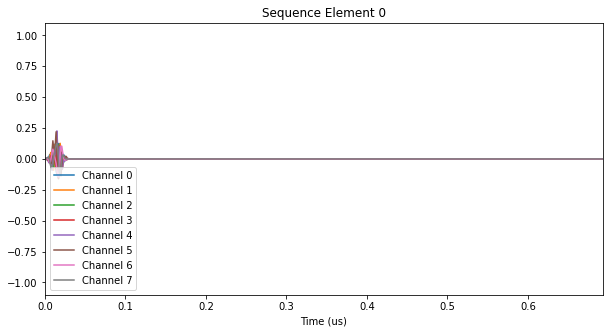

In [12]:
compiler_output.seq.plot(element=0)

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 1'}, xlabel='Time (us)'>)

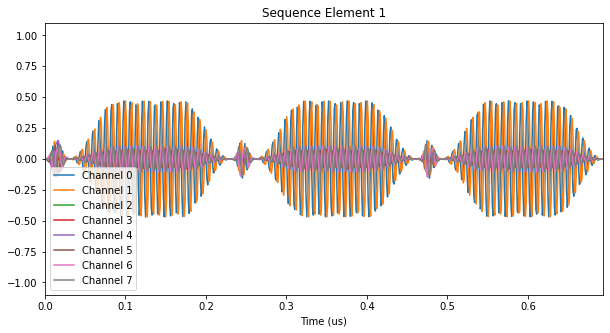

In [13]:
compiler_output.seq.plot(element=1)

## iToffoli circuit

In [18]:
circuit3 = qiskit.QuantumCircuit(8)
circuit3.append(qiskit_superstaq.IICCX, [4, 6, 5])
circuit1.draw(fold=-1)

q_0: ──────────
               
q_1: ──────────
               
q_2: ──────────
               
q_3: ──────────
               
q_4: ────o─────
     ┌───┴────┐
q_5: ┤ Rx(-π) ├
     └───┬────┘
q_6: ────o─────
               
q_7: ──────────

In [ ]:
compiler_output = provider.aqt_compile(circuit3)

In [20]:
print(compiler_output.circuit)

               
q_0: ──────────
               
q_1: ──────────
               
q_2: ──────────
               
q_3: ──────────
               
q_4: ────o─────
     ┌───┴────┐
q_5: ┤ Rx(-π) ├
     └───┬────┘
q_6: ────o─────
               


(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 0'}, xlabel='Time (us)'>)

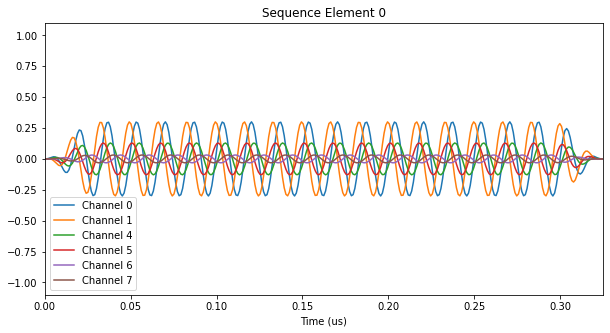

In [21]:
compiler_output.seq.plot(element=0)